# Data Analysis And Machine Learning using Campus Placement Dataset

In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() 

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/factors-affecting-campus-placement/Placement_Data_Full_Class.csv


In [5]:
my_filepath = "../input/factors-affecting-campus-placement/Placement_Data_Full_Class.csv"

In [6]:
my_data = pd.read_csv(my_filepath, index_col="sl_no")

In [7]:
my_data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
sl_no,,,,,,,,,,,,,,
1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [8]:
my_data.shape

(215, 14)

In [9]:
my_data.info

<bound method DataFrame.info of       gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p   degree_t  \
sl_no                                                                         
1          M  67.00   Others  91.00   Others  Commerce     58.00   Sci&Tech   
2          M  79.33  Central  78.33   Others   Science     77.48   Sci&Tech   
3          M  65.00  Central  68.00  Central      Arts     64.00  Comm&Mgmt   
4          M  56.00  Central  52.00  Central   Science     52.00   Sci&Tech   
5          M  85.80  Central  73.60  Central  Commerce     73.30  Comm&Mgmt   
...      ...    ...      ...    ...      ...       ...       ...        ...   
211        M  80.60   Others  82.00   Others  Commerce     77.60  Comm&Mgmt   
212        M  58.00   Others  60.00   Others   Science     72.00   Sci&Tech   
213        M  67.00   Others  67.00   Others  Commerce     73.00  Comm&Mgmt   
214        F  74.00   Others  66.00   Others  Commerce     58.00  Comm&Mgmt   
215        M  62.00 

In [10]:
my_data.describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [11]:
my_data.describe(include=object)

,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
count,215,215,215,215,215,215,215,215
unique,2,2,2,3,3,2,2,2
top,M,Central,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
freq,139,116,131,113,145,141,120,148


In [12]:
missing_values = my_data.isnull()
missing_values.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
sl_no,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,True
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
for column in missing_values.columns.values.tolist():
    print(column)
    print (missing_values[column].value_counts())
    print("")

gender
False    215
Name: gender, dtype: int64

ssc_p
False    215
Name: ssc_p, dtype: int64

ssc_b
False    215
Name: ssc_b, dtype: int64

hsc_p
False    215
Name: hsc_p, dtype: int64

hsc_b
False    215
Name: hsc_b, dtype: int64

hsc_s
False    215
Name: hsc_s, dtype: int64

degree_p
False    215
Name: degree_p, dtype: int64

degree_t
False    215
Name: degree_t, dtype: int64

workex
False    215
Name: workex, dtype: int64

etest_p
False    215
Name: etest_p, dtype: int64

specialisation
False    215
Name: specialisation, dtype: int64

mba_p
False    215
Name: mba_p, dtype: int64

status
False    215
Name: status, dtype: int64

salary
False    148
True      67
Name: salary, dtype: int64



Non numeric value in salary is replaced with 0 since these persons are not placed

In [14]:
my_data["salary"]=my_data["salary"].fillna(0)

In [15]:
my_data.columns

Index(['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p',
       'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p', 'status',
       'salary'],
      dtype='object')

In [16]:
print(my_data.status.value_counts(),"\n",
my_data.status.value_counts(normalize=True))

Placed        148
Not Placed     67
Name: status, dtype: int64 
 Placed        0.688372
Not Placed    0.311628
Name: status, dtype: float64


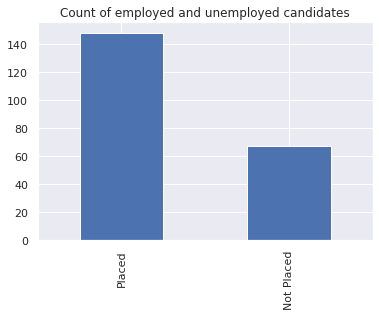

In [17]:

my_data.status.value_counts().plot.bar(title='Count of employed and unemployed candidates')

* 1. We see that there majority of the candidates are employed.

Checking the number of candidates corresponding to the various categories  (categorical variables) below:

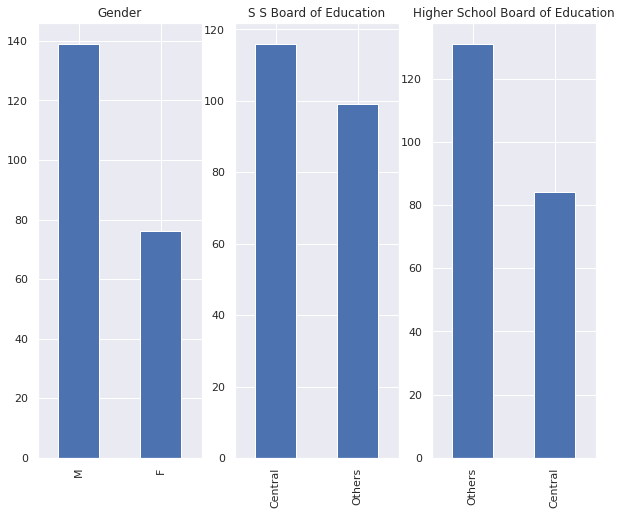

In [18]:
plt.figure(1) 
plt.subplot(131)
my_data.gender.value_counts().plot.bar(figsize=(10,8), title="Gender")
plt.subplot(132)
my_data.ssc_b.value_counts().plot.bar(figsize=(10,8),title="S S Board of Education")
plt.subplot(133)
my_data.hsc_b.value_counts().plot.bar(figsize=(10,8), title ="Higher School Board of Education")
plt.show()


* Most of the candidates are males.


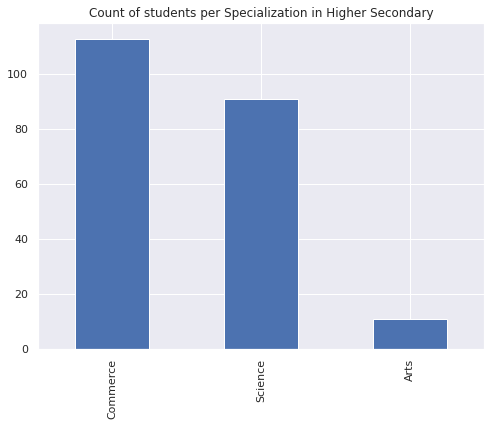

In [19]:
plt.figure() 
my_data.hsc_s.value_counts().plot.bar(figsize=(8,6), title="Count of students per Specialization in Higher Secondary")
plt.show()

* Majority of students studied Commerce in Higher Secondary School.

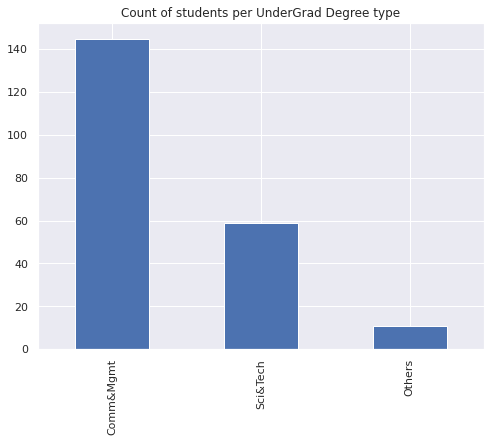

In [20]:
my_data.degree_t.value_counts().plot.bar(figsize=(8,6),title="Count of students per UnderGrad Degree type")

* Most of the Candidates studied Comm&Mgmt in their undergraduate studies.


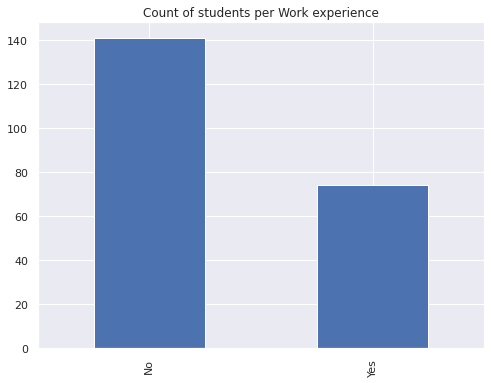

In [21]:
my_data.workex.value_counts().plot.bar(figsize=(8,6), title ="Count of students per Work experience")

* Most of the cadidates had no prior work experience

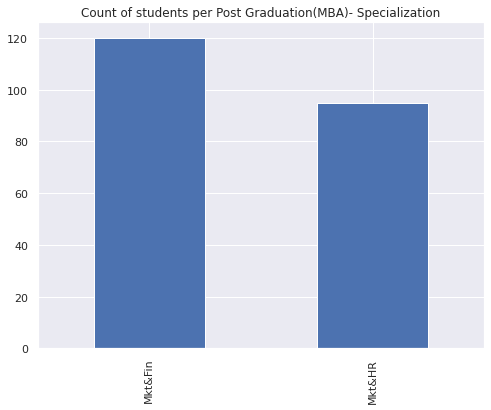

In [22]:
my_data.specialisation.value_counts().plot.bar(figsize=(8,6), title ="Count of students per Post Graduation(MBA)- Specialization")

* The prefared choice of post graduate studies amongst most of the students is Marketing and Finance

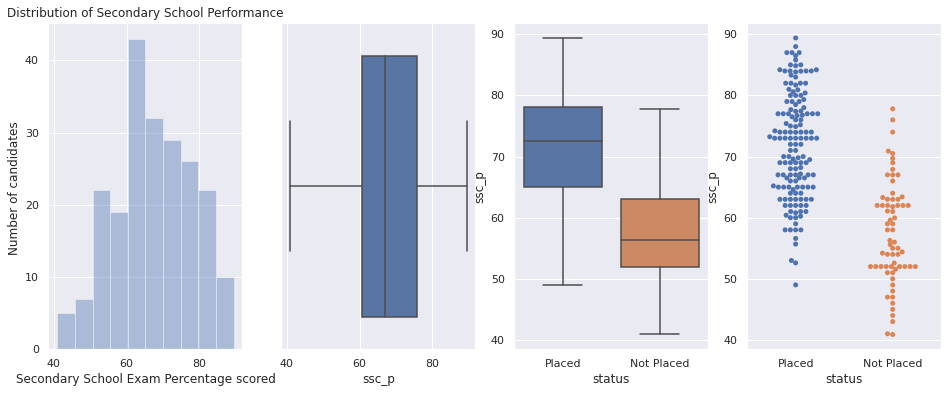

In [23]:
plt.figure(figsize=(16,6))
plt.subplot(141)
plt.title("Distribution of Secondary School Performance")
sns.distplot(a=my_data.ssc_p,kde=False)
plt.xlabel("Secondary School Exam Percentage scored")
plt.ylabel("Number of candidates ")
plt.subplot(142)
sns.boxplot(x=my_data.ssc_p)
plt.subplot(143)
sns.boxplot(x=my_data.status, y=my_data.ssc_p)
plt.subplot(144)
sns.swarmplot(x=my_data.status, y=my_data.ssc_p)
plt.show()

* A fairly normal distribution of cadidate secondary school exam score.
* Most of the candidates performed well.
* Majority of the candidates scored between 60 -70%
* Candidates that scored below 49 happen to be unemployed.
* Students that scored around 80 and above got hired.
* There are students who scored fairly good grades but are unemployed.

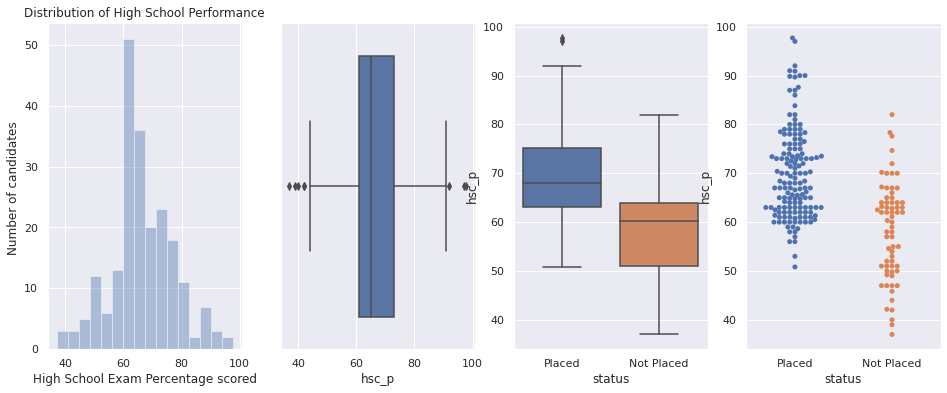

In [24]:

plt.figure(figsize=(16,6))
plt.subplot(141)
plt.title("Distribution of High School Performance")
sns.distplot(a=my_data.hsc_p,kde=False)
plt.xlabel("High School Exam Percentage scored")
plt.ylabel("Number of candidates ")
plt.subplot(142)
sns.boxplot(x=my_data.hsc_p)
plt.subplot(143)
sns.boxplot(x=my_data.status, y=my_data.hsc_p)
plt.subplot(144)
sns.swarmplot(x=my_data.status, y=my_data.hsc_p)
plt.show()

* Most of the students scored between 60% and 70% in High school
* Students that scored below 50% are not hired.
* Students that score very high marks are employed, however, there student(s) that score as high as 80% or more but are not hired.

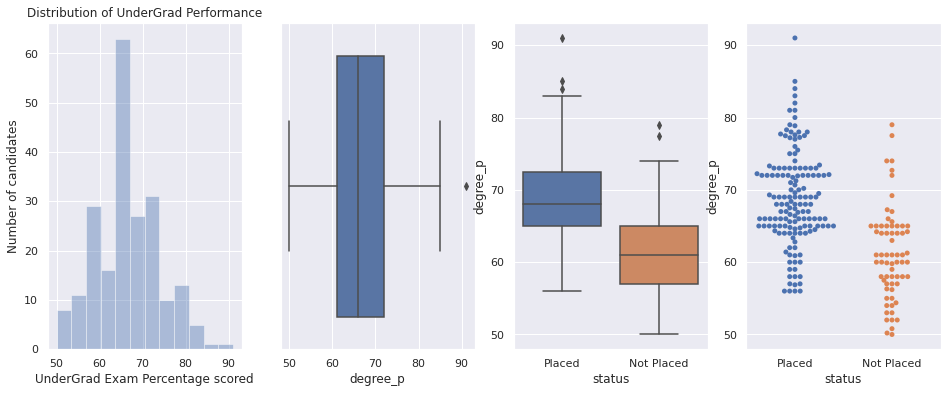

In [25]:
plt.figure(figsize=(16,6))
plt.subplot(141)
plt.title("Distribution of UnderGrad Performance")
sns.distplot(a=my_data.degree_p,kde=False)
plt.xlabel("UnderGrad Exam Percentage scored")
plt.ylabel("Number of candidates")
plt.subplot(142)
sns.boxplot(x=my_data.degree_p)
plt.subplot(143)
sns.boxplot(x=my_data.status, y=my_data.degree_p)
plt.subplot(144)
sns.swarmplot(x=my_data.status, y=my_data.degree_p)
plt.show()

* Most of the students performed well in their undergraduate studies.
* Students that scored below 55% percent are not hired while those that scored very high grades are hired.
* There is a good number of candidates that performed well but could not land jobs.

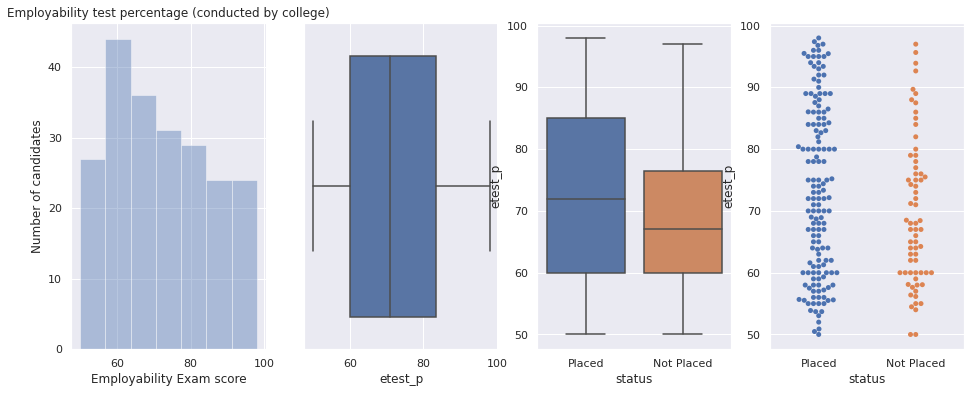

In [26]:
plt.figure(figsize=(16,6))
plt.subplot(141)
plt.title("Employability test percentage (conducted by college)")
sns.distplot(a=my_data.etest_p,kde=False)
plt.xlabel("Employability Exam score")
plt.ylabel("Number of candidates")
plt.subplot(142)
sns.boxplot(x=my_data.etest_p)
plt.subplot(143)
sns.boxplot(x=my_data.status, y=my_data.etest_p)
plt.subplot(144)
sns.swarmplot(x=my_data.status, y=my_data.etest_p)
plt.show()

* The professional test does not influence the possibility of being employed much, because students that are unemployed did not perform poorly.

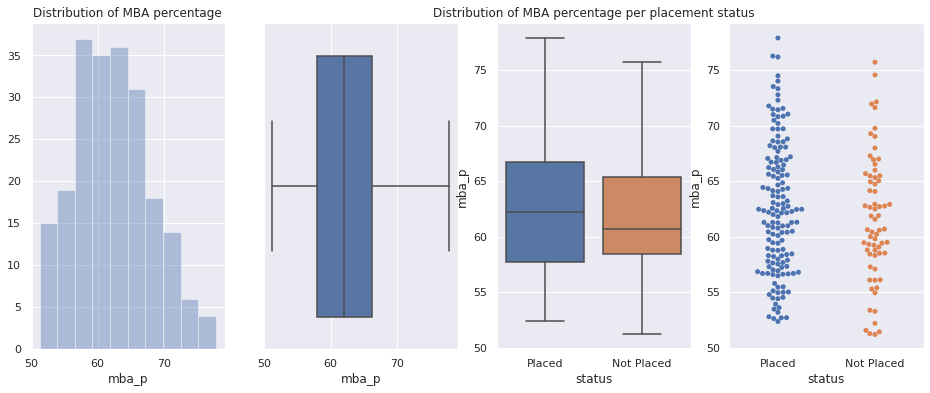

In [27]:
plt.figure(figsize=(16,6))
plt.subplot(141)
plt.title("Distribution of MBA percentage")
sns.distplot(a=my_data.mba_p,kde=False)
plt.subplot(142)
sns.boxplot(x=my_data.mba_p)
plt.subplot(143)
plt.title("Distribution of MBA percentage per placement status")
sns.boxplot(x=my_data.status, y=my_data.mba_p)
plt.subplot(144)
sns.swarmplot(x=my_data.status, y=my_data.mba_p)
plt.show()

* Most of the students scored between 57% - 66%. 
* Students that did not land jobs did not perform terribly in their graduate studies.

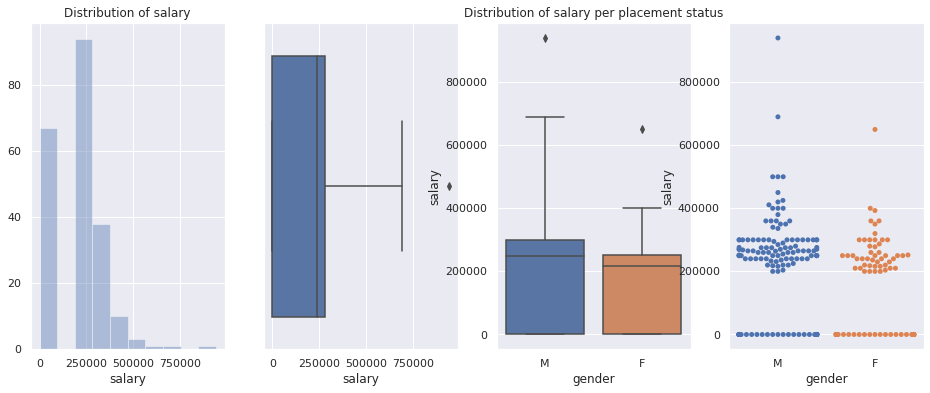

In [28]:
plt.figure(figsize=(16,6))
plt.subplot(141)
plt.title("Distribution of salary")
sns.distplot(a=my_data.salary,kde=False)
plt.subplot(142)
sns.boxplot(x=my_data.salary)
plt.subplot(143)
plt.title("Distribution of salary per placement status")
sns.boxplot(x=my_data.gender, y=my_data.salary)
plt.subplot(144)
sns.swarmplot(x=my_data.gender, y=my_data.salary)

plt.show()

* This is distribution is skew to the right.
* The presence of outliers is due to the fact that few of the candidates receive very huge salaries.
* Males receive higher salaries than females.

Below is the relationship between the employability status and the individual categories****

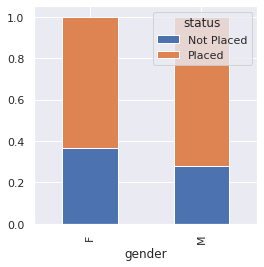

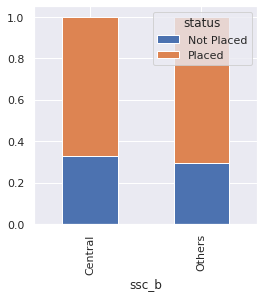

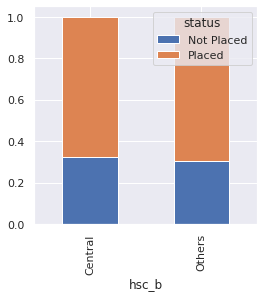

In [29]:
Gender=pd.crosstab(my_data['gender'],my_data['status']) 
Gender.div(Gender.sum(1), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

ssbe = pd.crosstab(my_data.ssc_b,my_data.status)
ssbe.div(ssbe.sum(1), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

hsbe = pd.crosstab(my_data.hsc_b,my_data.status)
hsbe.div(hsbe.sum(1), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))


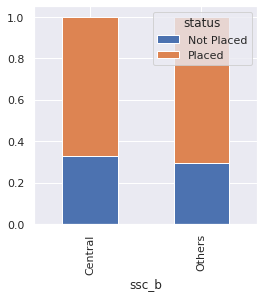

In [30]:
ssbe = pd.crosstab(my_data.ssc_b,my_data.status)
ssbe.div(ssbe.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

* The number of males employed are higher than that of the females
* Cadidates that attend the institutions managed by the central body are less employed as compare to the others

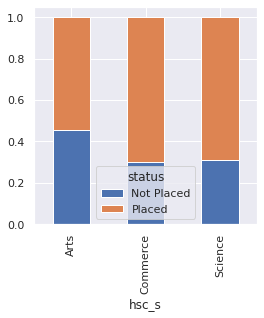

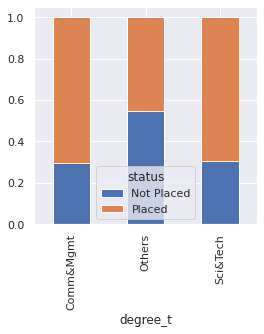

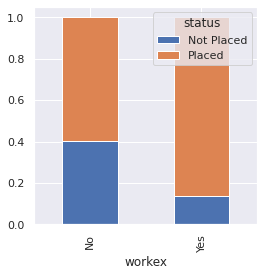

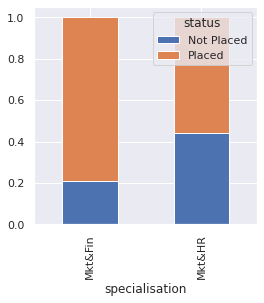

In [31]:
hscs = pd.crosstab(my_data.hsc_s,my_data.status)
hscs.div(hscs.sum(1),axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

degreeT = pd.crosstab(my_data.degree_t,my_data.status)
degreeT.div(degreeT.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

workX = pd.crosstab(my_data.workex,my_data.status)
workX.div(workX.sum(1), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

specialty = pd.crosstab(my_data.specialisation, my_data.status)
specialty.div(specialty.sum(1), axis=0).plot(kind="bar", stacked="True", figsize=(4,4))

* Most of the students that studied arts in high school are the least employed
* Students that specialised in either Comm&Mgt or Sci&Tech are mostly employed.
* Most of the cadidates with work experience had job placements.
* Candidates that specialised in Marketing & Finance hard more job placements than those that studied Marketing & Human Resource.

# Correlation Amongst numeric features

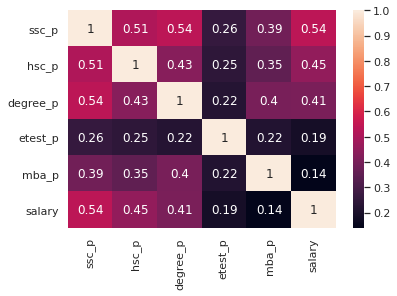

In [32]:
mycorr = my_data[['ssc_p','hsc_p','degree_p','etest_p','mba_p','salary']].corr()
sns.heatmap(mycorr,annot=True)

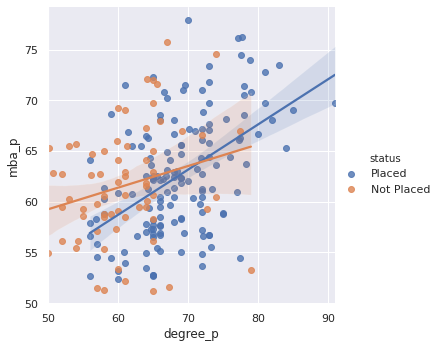

In [33]:
sns.lmplot(x="degree_p", y="mba_p", hue="status", data=my_data)

Candidates with very high degree percentage had very high MBA percentage and they have job placement. Candidates with very low degree percentage, usually had a very low or low MBA percentage and are not placed. 
However, there are unmeployed candidates who had high degree percentage and high MBA score percentage. There is a positive correlation between degree score and MBA percentage for both employed and unemployed cadidates, but correlation between degree score and MBA percentage for employed candidates is stronger than unemployed candidates. 

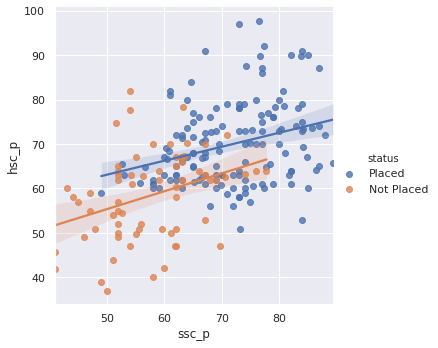

In [34]:
sns.lmplot(x="ssc_p", y="hsc_p", hue="status", data=my_data)

Candidates that had high percentage in secondary school had high grades in higher school and are employed whereas those that had low grades in secondary school had low grades in higher school and are not employed

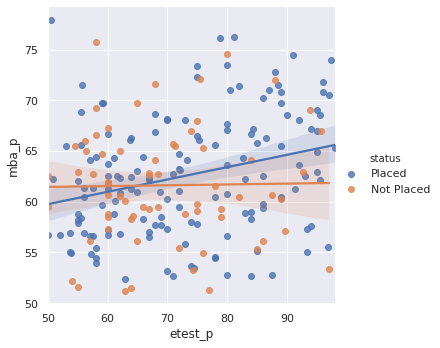

In [35]:
sns.lmplot(x="etest_p", y="mba_p", hue="status", data=my_data)

There is a poor relationship between the MBA percentage score and employability test percentage.

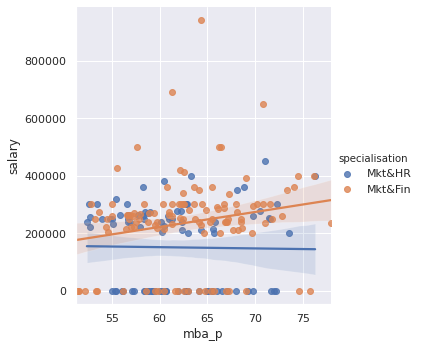

In [36]:
sns.lmplot(x="mba_p", y="salary", hue="specialisation", data=my_data)

* Candidates that specialized in Mk&Fin gain higher salaries than those in Mk&HR

# DATA PROCESSING FOR CLASSIFICATION

In [37]:
#Separating the the independent variable(X) and the target variable(y) from the dataset
X = my_data.drop('status',axis=1)
y = my_data.status

We have to change categorical data to numerical for the consumption of the models. This will be done by encoding the the categorical features

In [38]:
#OneHotEncoding will be deployed to change encode categorical variables with more than two unique items
degreedummy = pd.get_dummies(X.degree_t)
hscsdummy = pd.get_dummies(X.hsc_s)

In [39]:
X = pd.concat([X, degreedummy], axis=1)
X = pd.concat([X, hscsdummy], axis=1)

In [40]:
# drop original column of onehotencoded columns from X
X.drop("degree_t", axis = 1, inplace=True)
X.drop("hsc_s", axis = 1, inplace=True)

#Droping Salary since unemployed candidates automatically have 0 salary
X.drop("salary", axis = 1, inplace=True)

In [41]:
#LabelEncoder will be deployed to encode variables with two unique items
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X['gender'] = le.fit_transform(X.gender)
X['ssc_b'] = le.fit_transform(X.ssc_b)
X['hsc_b'] = le.fit_transform(X.hsc_b)
X['workex'] = le.fit_transform(X.workex)
X['specialisation'] = le.fit_transform(X.specialisation)
y = le.fit_transform(y)

In [42]:
#Standardizing the data to ensure all distributions are normal and also suppress outliers
from sklearn import preprocessing
X['etest_p'] = preprocessing.scale(X.etest_p)
X['degree_p'] = preprocessing.scale(X.degree_p)
X['mba_p'] = preprocessing.scale(X.mba_p)
X['ssc_p'] = preprocessing.scale(X.ssc_p)
X['hsc_p'] = preprocessing.scale(X.hsc_p)
X['degree_p'] = preprocessing.scale(X.degree_p)

In [43]:
X.tail()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,Comm&Mgmt,Others,Sci&Tech,Arts,Commerce,Science
sl_no,,,,,,,,,,,,,,,,
211,1,1.230940,1,1.441008,1,1.529612,0,1.426906,0,2.098321,1,0,0,0,1,0
212,1,-0.861266,1,-0.582513,1,0.766836,0,0.143408,0,-1.487711,0,0,1,0,0,1
213,1,-0.028087,1,0.061335,1,0.903046,1,-0.989091,0,1.278706,1,0,0,0,1,0
214,0,0.619941,1,-0.030644,1,-1.140102,0,-0.158592,1,-0.351934,1,0,0,0,1,0
215,1,-0.490964,0,-0.766470,1,-1.821152,0,1.275907,1,-0.353652,1,0,0,0,0,1


In [44]:
X.shape, y.shape

((215, 16), (215,))

In [45]:
#Split data for training & validation
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state = 1)

# **MACHINE LEARNING**

**TASK:** To predict whether a candidate got hired or not

**Implementing Classification models**

In [46]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

***DecisionTreeClassifier***

In [47]:
#Decision Tree


dmodel = DecisionTreeClassifier()

dmodel.fit(X_train,y_train)

y_predx = dmodel.predict(X_test)

In [48]:
accuracy_score(y_predx,y_test)

0.8

In [49]:
print(classification_report(y_test,y_predx))

              precision    recall  f1-score   support

           0       0.71      0.60      0.65        20
           1       0.83      0.89      0.86        45

    accuracy                           0.80        65
   macro avg       0.77      0.74      0.75        65
weighted avg       0.79      0.80      0.80        65



[[12  8]
 [ 5 40]]


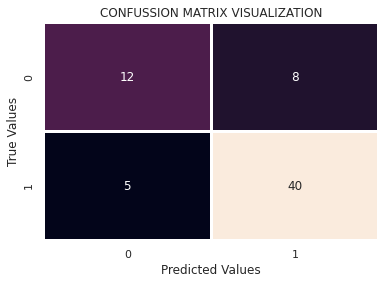

In [50]:
#confusion matrix: Idea for a yes/no predictions
print(confusion_matrix(y_test,y_predx))

sns.heatmap(confusion_matrix(y_test,y_predx),annot=True,lw =2,cbar=False)
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("CONFUSSION MATRIX VISUALIZATION")
plt.show()

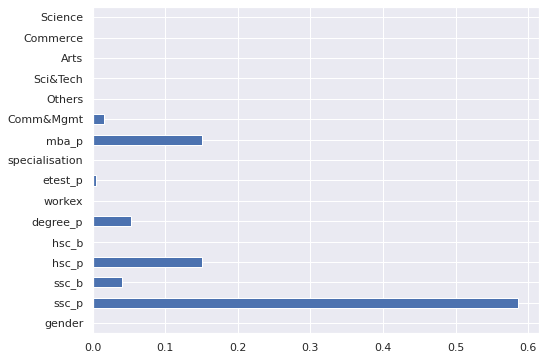

In [51]:
importances=pd.Series(dmodel.feature_importances_, index=X.columns) 
importances.plot(kind='barh', figsize=(8,6))

* The model correctly predicted 40 candidates as employed and 12 as unemployed. It made a combined 13(thus 8+5) wrong predictions.
* Secondary percentage,MBA grade ,higher school percentage influence the model's decision most.
* A precision of 79% and recall of 80%
* The predicted values has 80% similarity with the actual values

***RandomForestClassifier***

In [52]:
#Random Forest
rtmodel=RandomForestClassifier()

rtmodel.fit(X_train,y_train)
y_predr = rtmodel.predict(X_test)

In [53]:
accuracy_score(y_predr,y_test)

0.8461538461538461

[[12  8]
 [ 2 43]]


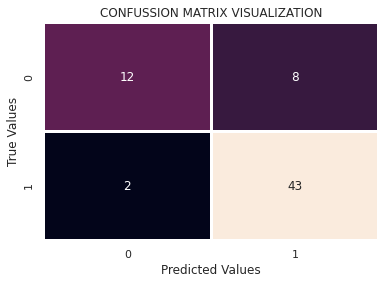

In [54]:
#confusion matrix: Idea for a yes/no predictions
print(confusion_matrix(y_test,y_predr))

sns.heatmap(confusion_matrix(y_test,y_predr),annot=True,lw =2,cbar=False)
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("CONFUSSION MATRIX VISUALIZATION")
plt.show()

In [55]:
print(classification_report(y_test,y_predr))

              precision    recall  f1-score   support

           0       0.86      0.60      0.71        20
           1       0.84      0.96      0.90        45

    accuracy                           0.85        65
   macro avg       0.85      0.78      0.80        65
weighted avg       0.85      0.85      0.84        65



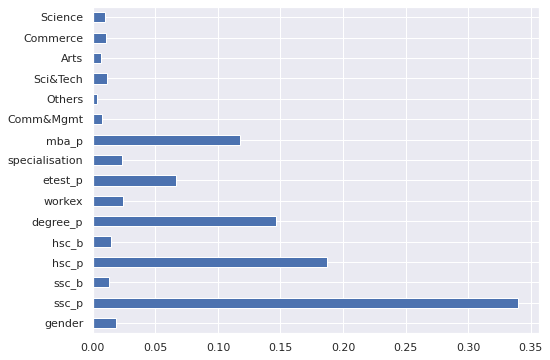

In [56]:
importances=pd.Series(rtmodel.feature_importances_, index=X.columns) 
importances.plot(kind='barh', figsize=(8,6))

* The model's prediction is 85% similar to the actual values.
* There were 42 true positives (correctly predicted as employed), 12 true negatives(correctly predicted as negative),7 type 1 errors or false positives (wrongly predicted as employed) and 3 type 2 errors (wrongly predicted as umeployed).
* The model had 84% precision and 85% recall.

**GridSearchCV** is deployed to retrieve the most optimum parameters for the random tree regression model

In [57]:
#Boost for random forest

from sklearn.model_selection import GridSearchCV

In [58]:
# Provide range for max_depth from 1 to 20 with an interval of 2 and from 1 to 200 with an interval of 20 for n_estimators 
paramgrid = {'max_depth': list(range(1, 20, 2)), 'n_estimators': list(range(1, 200, 20))}
grid_search=GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)

In [59]:
# Fit the grid search model 
grid_search.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161,
                                          181]})

In [60]:
# Estimating the optimized value 
grid_search.best_estimator_

RandomForestClassifier(max_depth=3, n_estimators=141, random_state=1)

In [61]:
RFCmodel = RandomForestClassifier(max_depth=3, n_estimators=141, random_state=1)
RFCmodel.fit(X_train,y_train)
y_predrfc = RFCmodel.predict(X_test)

In [62]:
accuracy_score(y_predrfc,y_test)

0.8153846153846154

[[10 10]
 [ 2 43]]


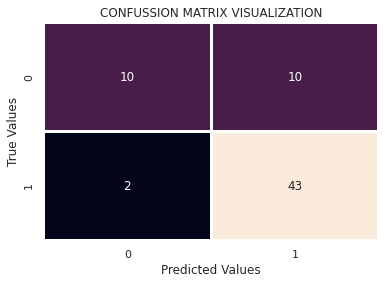

In [63]:
#confusion matrix: Idea for a yes/no predictions
print(confusion_matrix(y_test,y_predrfc))

sns.heatmap(confusion_matrix(y_test,y_predrfc),annot=True,lw =2,cbar=False)
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("CONFUSSION MATRIX VISUALIZATION")
plt.show()

In [64]:
print(classification_report(y_test,y_predrfc))

              precision    recall  f1-score   support

           0       0.83      0.50      0.62        20
           1       0.81      0.96      0.88        45

    accuracy                           0.82        65
   macro avg       0.82      0.73      0.75        65
weighted avg       0.82      0.82      0.80        65



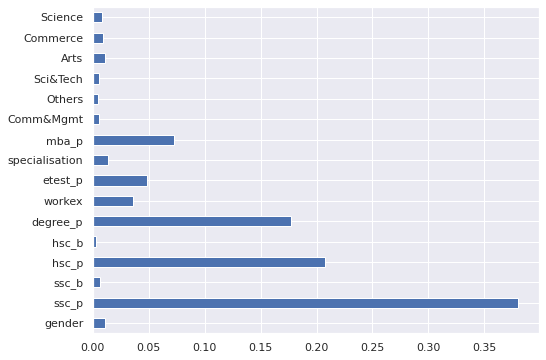

In [65]:
importances=pd.Series(RFCmodel.feature_importances_, index=X.columns) 
importances.plot(kind='barh', figsize=(8,6))

* The model recorded 82% accuracy.
* There was 82% precision and 82% recall.
* Secondary school performance influenced the model's decion the most.
* 43 true positives(correctly predicted as employed), 10 true negatives(correctly predicted as unemployed), 10 false positives(type 1 error)(wrongly predicted unemployed candidate as employed) and 2 false negatives (type 2 error)(wrongly predicted employed candidate as unemployed).

***XGBoost***

In [66]:
#pip install xgboost

In [67]:
from xgboost import XGBClassifier

In [68]:
# fit model no training data
XGmodel = XGBClassifier()
XGmodel.fit(X_train, y_train)
y_predXG = XGmodel.predict(X_test)

In [69]:
accuracy_score(y_predXG,y_test)

0.8769230769230769

[[16  4]
 [ 4 41]]


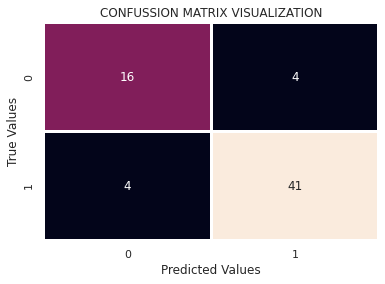

In [70]:
#confusion matrix: Idea for a yes/no predictions
print(confusion_matrix(y_test,y_predXG))

sns.heatmap(confusion_matrix(y_test,y_predXG),annot=True,lw =2,cbar=False)
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("CONFUSSION MATRIX VISUALIZATION")
plt.show()

In [71]:
print(classification_report(y_test,y_predXG))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        20
           1       0.91      0.91      0.91        45

    accuracy                           0.88        65
   macro avg       0.86      0.86      0.86        65
weighted avg       0.88      0.88      0.88        65



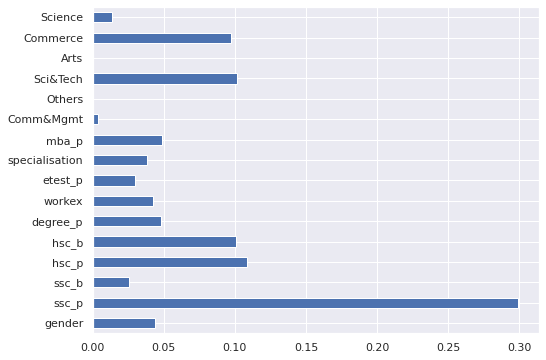

In [72]:
importances=pd.Series(XGmodel.feature_importances_, index=X.columns) 
importances.plot(kind='barh', figsize=(8,6))

* XGBoost model provided an accuracy score of 88%
* 88% precision and 88% recall
* Correctly predicted 41 candidates as employed, 16 correctedly predicted as unemployed and 8 wrong predictions.

**Hyperparameter tuning of XGBoost with Grid Search**

In [73]:
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

In [74]:
estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)

In [75]:
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 10,
    verbose=True
)

In [76]:
# Fit the grid search model 
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 96 candidates, totalling 960 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    6.8s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:   25.6s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:   58.3s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:  1.9min
[Parallel(n_jobs=10)]: Done 960 out of 960 | elapsed:  2.4min finished


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, seed=42,
                                     subsample=No

In [77]:
# Estimating the optimized value 
grid_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=180, n_jobs=4, nthread=4, num_parallel_tree=1,
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=42, subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [78]:
XGmodel2 = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=180, n_jobs=4, nthread=4, num_parallel_tree=1,
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=42, subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)
XGmodel2.fit(X_train,y_train)
y_predXG2 = XGmodel2.predict(X_test)

In [79]:
accuracy_score(y_predXG2,y_test)

0.8615384615384616

[[15  5]
 [ 4 41]]


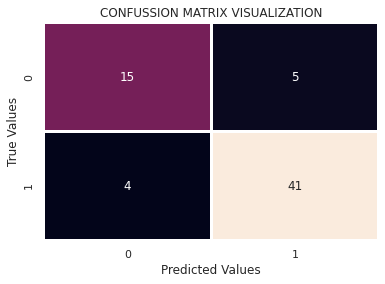

In [80]:

print(confusion_matrix(y_test,y_predXG2))

sns.heatmap(confusion_matrix(y_test,y_predXG2),annot=True,lw =2,cbar=False)
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("CONFUSSION MATRIX VISUALIZATION")
plt.show()

In [107]:
print(classification_report(y_test,y_predXG2))

              precision    recall  f1-score   support

           0       0.79      0.75      0.77        20
           1       0.89      0.91      0.90        45

    accuracy                           0.86        65
   macro avg       0.84      0.83      0.84        65
weighted avg       0.86      0.86      0.86        65



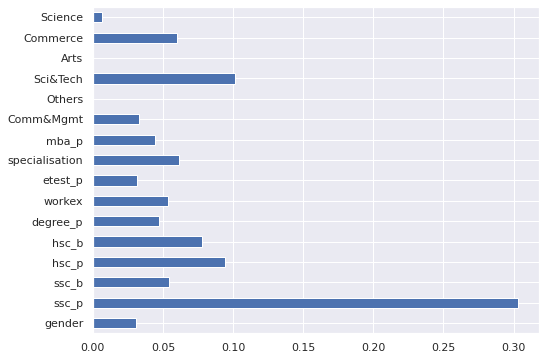

In [81]:
importances=pd.Series(XGmodel2.feature_importances_, index=X.columns) 
importances.plot(kind='barh', figsize=(8,6))

* The model predicted 41 candidates correctly as employed and 4 employed candidates wrongly as unemployed.
* 15 candidates were predicted correctly as unemployed and 5 unemployed candidates were predicted wrongly as unemployed.
* Predictions were made with 86% accuracy across both classes.
* High school performance had the most vital effect in decision making.

***LIGHTGBM***

In [82]:
from lightgbm import LGBMClassifier

In [83]:
# fit the model on the whole dataset
LGmodel = LGBMClassifier()
LGmodel.fit(X_train, y_train)
y_predL = LGmodel.predict(X_test)

In [84]:
accuracy_score(y_predL,y_test)

0.8769230769230769

[[15  5]
 [ 3 42]]


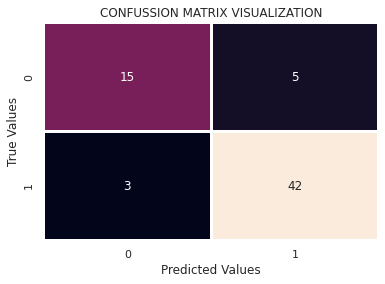

In [85]:
#confusion matrix: Idea for a yes/no predictions
print(confusion_matrix(y_test,y_predL))

sns.heatmap(confusion_matrix(y_test,y_predL),annot=True,lw =2,cbar=False)
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("CONFUSSION MATRIX VISUALIZATION")
plt.show()

In [86]:
print(classification_report(y_test,y_predL))

              precision    recall  f1-score   support

           0       0.83      0.75      0.79        20
           1       0.89      0.93      0.91        45

    accuracy                           0.88        65
   macro avg       0.86      0.84      0.85        65
weighted avg       0.88      0.88      0.88        65



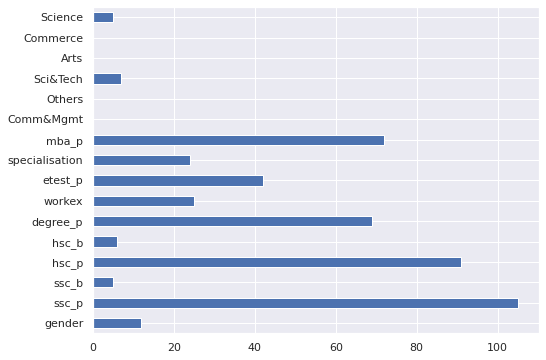

In [87]:
importances=pd.Series(LGmodel.feature_importances_, index=X.columns) 
importances.plot(kind='barh', figsize=(8,6))

* The lightGBM model delivered an accuracy rate of 88%.
* 88% Recall and 88% precision scores.
* Secondary school percentage, High School percentage, MBA percentage and degree score, greatly influenced the    model's decisions.
* Correctly predicted 42 candidates as employed, 15 correctedly predicted as unemployed and 8 wrong predictions.


***Catboost***

In [88]:
#pip install catboost

In [89]:
from catboost import CatBoostClassifier

In [90]:
CatModel = CatBoostClassifier()
CatModel.fit(X_train,y_train)
y_predCat = CatModel.predict(X_test)

Learning rate set to 0.004583
0:	learn: 0.6898864	total: 52.9ms	remaining: 52.9s
1:	learn: 0.6865931	total: 54.1ms	remaining: 27s
2:	learn: 0.6828043	total: 55.3ms	remaining: 18.4s
3:	learn: 0.6787209	total: 57.5ms	remaining: 14.3s
4:	learn: 0.6753042	total: 58.7ms	remaining: 11.7s
5:	learn: 0.6718107	total: 59.8ms	remaining: 9.91s
6:	learn: 0.6683066	total: 60.8ms	remaining: 8.62s
7:	learn: 0.6648376	total: 61.7ms	remaining: 7.66s
8:	learn: 0.6610865	total: 62.8ms	remaining: 6.91s
9:	learn: 0.6575755	total: 64ms	remaining: 6.33s
10:	learn: 0.6546631	total: 64.5ms	remaining: 5.8s
11:	learn: 0.6510681	total: 65.8ms	remaining: 5.41s
12:	learn: 0.6479614	total: 67ms	remaining: 5.08s
13:	learn: 0.6446444	total: 68.2ms	remaining: 4.8s
14:	learn: 0.6419638	total: 69.3ms	remaining: 4.55s
15:	learn: 0.6386813	total: 71ms	remaining: 4.37s
16:	learn: 0.6355751	total: 72.2ms	remaining: 4.18s
17:	learn: 0.6324552	total: 73.5ms	remaining: 4.01s
18:	learn: 0.6290938	total: 76ms	remaining: 3.92s
19:	

324:	learn: 0.2431281	total: 374ms	remaining: 776ms
325:	learn: 0.2424785	total: 375ms	remaining: 776ms
326:	learn: 0.2420447	total: 376ms	remaining: 774ms
327:	learn: 0.2414233	total: 377ms	remaining: 773ms
328:	learn: 0.2409803	total: 378ms	remaining: 771ms
329:	learn: 0.2405012	total: 379ms	remaining: 770ms
330:	learn: 0.2398654	total: 380ms	remaining: 768ms
331:	learn: 0.2394119	total: 381ms	remaining: 767ms
332:	learn: 0.2388910	total: 382ms	remaining: 765ms
333:	learn: 0.2382345	total: 383ms	remaining: 764ms
334:	learn: 0.2376801	total: 384ms	remaining: 762ms
335:	learn: 0.2374438	total: 385ms	remaining: 760ms
336:	learn: 0.2370736	total: 386ms	remaining: 759ms
337:	learn: 0.2369101	total: 386ms	remaining: 756ms
338:	learn: 0.2364222	total: 387ms	remaining: 755ms
339:	learn: 0.2359676	total: 388ms	remaining: 753ms
340:	learn: 0.2355448	total: 389ms	remaining: 751ms
341:	learn: 0.2349795	total: 390ms	remaining: 750ms
342:	learn: 0.2346719	total: 391ms	remaining: 748ms
343:	learn: 

528:	learn: 0.1694787	total: 560ms	remaining: 499ms
529:	learn: 0.1691807	total: 562ms	remaining: 499ms
530:	learn: 0.1690194	total: 563ms	remaining: 497ms
531:	learn: 0.1686324	total: 564ms	remaining: 496ms
532:	learn: 0.1683020	total: 565ms	remaining: 495ms
533:	learn: 0.1680727	total: 566ms	remaining: 494ms
534:	learn: 0.1676953	total: 567ms	remaining: 493ms
535:	learn: 0.1673928	total: 568ms	remaining: 491ms
536:	learn: 0.1670174	total: 569ms	remaining: 490ms
537:	learn: 0.1666571	total: 570ms	remaining: 489ms
538:	learn: 0.1663511	total: 571ms	remaining: 488ms
539:	learn: 0.1662356	total: 572ms	remaining: 487ms
540:	learn: 0.1660580	total: 572ms	remaining: 486ms
541:	learn: 0.1658326	total: 573ms	remaining: 485ms
542:	learn: 0.1655995	total: 574ms	remaining: 483ms
543:	learn: 0.1652042	total: 575ms	remaining: 482ms
544:	learn: 0.1649000	total: 576ms	remaining: 481ms
545:	learn: 0.1645968	total: 577ms	remaining: 480ms
546:	learn: 0.1642845	total: 578ms	remaining: 479ms
547:	learn: 

730:	learn: 0.1245186	total: 749ms	remaining: 276ms
731:	learn: 0.1243812	total: 750ms	remaining: 275ms
732:	learn: 0.1241922	total: 751ms	remaining: 274ms
733:	learn: 0.1241052	total: 752ms	remaining: 272ms
734:	learn: 0.1239253	total: 753ms	remaining: 271ms
735:	learn: 0.1237726	total: 753ms	remaining: 270ms
736:	learn: 0.1236302	total: 754ms	remaining: 269ms
737:	learn: 0.1234100	total: 755ms	remaining: 268ms
738:	learn: 0.1232188	total: 756ms	remaining: 267ms
739:	learn: 0.1229451	total: 757ms	remaining: 266ms
740:	learn: 0.1227931	total: 758ms	remaining: 265ms
741:	learn: 0.1226232	total: 759ms	remaining: 264ms
742:	learn: 0.1224762	total: 760ms	remaining: 263ms
743:	learn: 0.1223152	total: 761ms	remaining: 262ms
744:	learn: 0.1220940	total: 762ms	remaining: 261ms
745:	learn: 0.1219710	total: 763ms	remaining: 260ms
746:	learn: 0.1218977	total: 764ms	remaining: 259ms
747:	learn: 0.1217123	total: 765ms	remaining: 258ms
748:	learn: 0.1216015	total: 766ms	remaining: 257ms
749:	learn: 

930:	learn: 0.0947370	total: 935ms	remaining: 69.3ms
931:	learn: 0.0945899	total: 939ms	remaining: 68.5ms
932:	learn: 0.0943386	total: 940ms	remaining: 67.5ms
933:	learn: 0.0941827	total: 941ms	remaining: 66.5ms
934:	learn: 0.0941137	total: 942ms	remaining: 65.5ms
935:	learn: 0.0940093	total: 943ms	remaining: 64.5ms
936:	learn: 0.0939213	total: 944ms	remaining: 63.5ms
937:	learn: 0.0937905	total: 945ms	remaining: 62.5ms
938:	learn: 0.0936758	total: 947ms	remaining: 61.5ms
939:	learn: 0.0935815	total: 948ms	remaining: 60.5ms
940:	learn: 0.0934528	total: 949ms	remaining: 59.5ms
941:	learn: 0.0933524	total: 950ms	remaining: 58.5ms
942:	learn: 0.0932738	total: 951ms	remaining: 57.5ms
943:	learn: 0.0931329	total: 951ms	remaining: 56.4ms
944:	learn: 0.0930019	total: 952ms	remaining: 55.4ms
945:	learn: 0.0928779	total: 953ms	remaining: 54.4ms
946:	learn: 0.0927600	total: 954ms	remaining: 53.4ms
947:	learn: 0.0926265	total: 955ms	remaining: 52.4ms
948:	learn: 0.0925635	total: 956ms	remaining: 

In [91]:
accuracy_score(y_predCat,y_test)

0.8461538461538461

[[12  8]
 [ 2 43]]


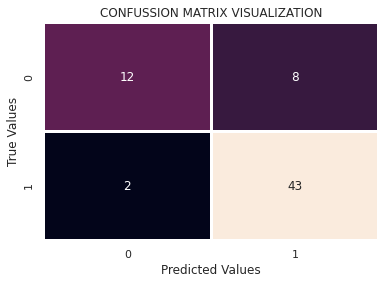

In [92]:
#confusion matrix: Idea for a yes/no predictions
print(confusion_matrix(y_test,y_predCat))

sns.heatmap(confusion_matrix(y_test,y_predCat),annot=True,lw =2,cbar=False)
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("CONFUSSION MATRIX VISUALIZATION")
plt.show()

In [93]:
print(classification_report(y_test,y_predCat))

              precision    recall  f1-score   support

           0       0.86      0.60      0.71        20
           1       0.84      0.96      0.90        45

    accuracy                           0.85        65
   macro avg       0.85      0.78      0.80        65
weighted avg       0.85      0.85      0.84        65



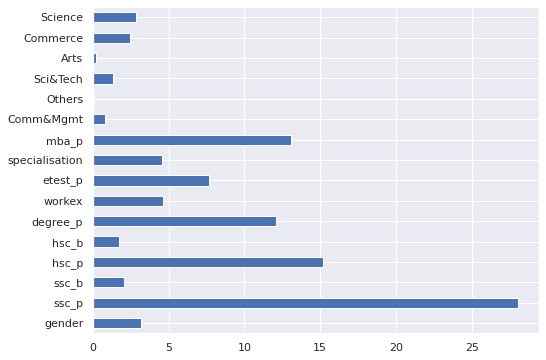

In [94]:
importances=pd.Series(CatModel.feature_importances_, index=X.columns) 
importances.plot(kind='barh', figsize=(8,6))

* This model made classifications with 85% accuracy.
* Both precision & recall are at 85%
* Secondary school percentage influence the decisions most.
* The model correctly predicted 43 candidates as employed,it correctly predicted  12 candidates as unemployed. 8 candidates were wrongly predicted as employed and 2 candidates were wrongly predicted as unemployed

**ENSEMBLEMENT LEARNING**

In [95]:
from sklearn.ensemble import VotingClassifier

In [96]:
eclf = VotingClassifier(estimators=[('dt', dmodel), ('rf1', rtmodel), ('rf2', RFCmodel),('cat', CatModel), ('lgb', LGmodel),('xgb', XGmodel),('xgb2', XGmodel2)], voting='soft', weights=[1, 1, 1, 1, 1, 1, 1])
eclf.fit(X_train, y_train)


Learning rate set to 0.004583
0:	learn: 0.6898864	total: 1.08ms	remaining: 1.08s
1:	learn: 0.6865931	total: 2.17ms	remaining: 1.08s
2:	learn: 0.6828043	total: 3.19ms	remaining: 1.06s
3:	learn: 0.6787209	total: 4.19ms	remaining: 1.04s
4:	learn: 0.6753042	total: 5.12ms	remaining: 1.02s
5:	learn: 0.6718107	total: 6.13ms	remaining: 1.02s
6:	learn: 0.6683066	total: 7.12ms	remaining: 1.01s
7:	learn: 0.6648376	total: 8.1ms	remaining: 1s
8:	learn: 0.6610865	total: 9.06ms	remaining: 997ms
9:	learn: 0.6575755	total: 10.4ms	remaining: 1.03s
10:	learn: 0.6546631	total: 11.1ms	remaining: 994ms
11:	learn: 0.6510681	total: 12.1ms	remaining: 996ms
12:	learn: 0.6479614	total: 16.6ms	remaining: 1.26s
13:	learn: 0.6446444	total: 17.6ms	remaining: 1.24s
14:	learn: 0.6419638	total: 18.6ms	remaining: 1.22s
15:	learn: 0.6386813	total: 19.6ms	remaining: 1.2s
16:	learn: 0.6355751	total: 20.6ms	remaining: 1.19s
17:	learn: 0.6324552	total: 21.7ms	remaining: 1.18s
18:	learn: 0.6290938	total: 22.7ms	remaining: 1.1

163:	learn: 0.3573748	total: 189ms	remaining: 965ms
164:	learn: 0.3567344	total: 191ms	remaining: 964ms
165:	learn: 0.3558230	total: 191ms	remaining: 961ms
166:	learn: 0.3548097	total: 192ms	remaining: 960ms
167:	learn: 0.3538166	total: 193ms	remaining: 958ms
168:	learn: 0.3528060	total: 194ms	remaining: 955ms
169:	learn: 0.3515242	total: 195ms	remaining: 953ms
170:	learn: 0.3504210	total: 196ms	remaining: 951ms
171:	learn: 0.3492915	total: 197ms	remaining: 949ms
172:	learn: 0.3485773	total: 198ms	remaining: 947ms
173:	learn: 0.3476063	total: 199ms	remaining: 945ms
174:	learn: 0.3465002	total: 200ms	remaining: 943ms
175:	learn: 0.3455946	total: 201ms	remaining: 941ms
176:	learn: 0.3447224	total: 202ms	remaining: 939ms
177:	learn: 0.3438857	total: 203ms	remaining: 937ms
178:	learn: 0.3425575	total: 204ms	remaining: 935ms
179:	learn: 0.3415043	total: 205ms	remaining: 932ms
180:	learn: 0.3406749	total: 206ms	remaining: 930ms
181:	learn: 0.3400871	total: 207ms	remaining: 928ms
182:	learn: 

367:	learn: 0.2237061	total: 377ms	remaining: 647ms
368:	learn: 0.2233543	total: 379ms	remaining: 648ms
369:	learn: 0.2229220	total: 380ms	remaining: 647ms
370:	learn: 0.2225415	total: 381ms	remaining: 646ms
371:	learn: 0.2219453	total: 382ms	remaining: 645ms
372:	learn: 0.2215539	total: 383ms	remaining: 644ms
373:	learn: 0.2209999	total: 384ms	remaining: 643ms
374:	learn: 0.2205539	total: 385ms	remaining: 641ms
375:	learn: 0.2200335	total: 390ms	remaining: 647ms
376:	learn: 0.2196488	total: 391ms	remaining: 646ms
377:	learn: 0.2191225	total: 392ms	remaining: 645ms
378:	learn: 0.2186762	total: 393ms	remaining: 644ms
379:	learn: 0.2182232	total: 394ms	remaining: 643ms
380:	learn: 0.2179021	total: 395ms	remaining: 641ms
381:	learn: 0.2174560	total: 396ms	remaining: 640ms
382:	learn: 0.2171717	total: 397ms	remaining: 639ms
383:	learn: 0.2166824	total: 398ms	remaining: 638ms
384:	learn: 0.2162418	total: 398ms	remaining: 636ms
385:	learn: 0.2157580	total: 399ms	remaining: 635ms
386:	learn: 

560:	learn: 0.1606401	total: 565ms	remaining: 442ms
561:	learn: 0.1605145	total: 566ms	remaining: 441ms
562:	learn: 0.1604026	total: 567ms	remaining: 440ms
563:	learn: 0.1601939	total: 568ms	remaining: 439ms
564:	learn: 0.1599573	total: 569ms	remaining: 438ms
565:	learn: 0.1597880	total: 570ms	remaining: 437ms
566:	learn: 0.1596009	total: 571ms	remaining: 436ms
567:	learn: 0.1593716	total: 572ms	remaining: 435ms
568:	learn: 0.1592083	total: 572ms	remaining: 434ms
569:	learn: 0.1589725	total: 573ms	remaining: 433ms
570:	learn: 0.1587338	total: 574ms	remaining: 432ms
571:	learn: 0.1584257	total: 575ms	remaining: 431ms
572:	learn: 0.1581993	total: 576ms	remaining: 429ms
573:	learn: 0.1578531	total: 577ms	remaining: 428ms
574:	learn: 0.1575711	total: 578ms	remaining: 427ms
575:	learn: 0.1572307	total: 579ms	remaining: 426ms
576:	learn: 0.1569889	total: 580ms	remaining: 425ms
577:	learn: 0.1567289	total: 581ms	remaining: 424ms
578:	learn: 0.1564395	total: 582ms	remaining: 423ms
579:	learn: 

752:	learn: 0.1208851	total: 753ms	remaining: 247ms
753:	learn: 0.1207789	total: 755ms	remaining: 246ms
754:	learn: 0.1205716	total: 758ms	remaining: 246ms
755:	learn: 0.1203575	total: 759ms	remaining: 245ms
756:	learn: 0.1201899	total: 760ms	remaining: 244ms
757:	learn: 0.1199667	total: 761ms	remaining: 243ms
758:	learn: 0.1198499	total: 762ms	remaining: 242ms
759:	learn: 0.1197028	total: 763ms	remaining: 241ms
760:	learn: 0.1194713	total: 764ms	remaining: 240ms
761:	learn: 0.1192609	total: 764ms	remaining: 239ms
762:	learn: 0.1191108	total: 765ms	remaining: 238ms
763:	learn: 0.1188664	total: 766ms	remaining: 237ms
764:	learn: 0.1186752	total: 767ms	remaining: 236ms
765:	learn: 0.1185276	total: 768ms	remaining: 235ms
766:	learn: 0.1184675	total: 769ms	remaining: 234ms
767:	learn: 0.1182896	total: 770ms	remaining: 233ms
768:	learn: 0.1181677	total: 771ms	remaining: 232ms
769:	learn: 0.1179771	total: 772ms	remaining: 231ms
770:	learn: 0.1178901	total: 773ms	remaining: 229ms
771:	learn: 

957:	learn: 0.0915153	total: 941ms	remaining: 41.3ms
958:	learn: 0.0913949	total: 942ms	remaining: 40.3ms
959:	learn: 0.0912557	total: 943ms	remaining: 39.3ms
960:	learn: 0.0911514	total: 944ms	remaining: 38.3ms
961:	learn: 0.0909840	total: 945ms	remaining: 37.3ms
962:	learn: 0.0908637	total: 945ms	remaining: 36.3ms
963:	learn: 0.0906968	total: 946ms	remaining: 35.3ms
964:	learn: 0.0905592	total: 947ms	remaining: 34.4ms
965:	learn: 0.0904454	total: 948ms	remaining: 33.4ms
966:	learn: 0.0903101	total: 949ms	remaining: 32.4ms
967:	learn: 0.0902260	total: 950ms	remaining: 31.4ms
968:	learn: 0.0900988	total: 951ms	remaining: 30.4ms
969:	learn: 0.0899827	total: 952ms	remaining: 29.4ms
970:	learn: 0.0898876	total: 953ms	remaining: 28.5ms
971:	learn: 0.0897318	total: 954ms	remaining: 27.5ms
972:	learn: 0.0896106	total: 955ms	remaining: 26.5ms
973:	learn: 0.0895645	total: 955ms	remaining: 25.5ms
974:	learn: 0.0895215	total: 956ms	remaining: 24.5ms
975:	learn: 0.0893933	total: 957ms	remaining: 

VotingClassifier(estimators=[('dt', DecisionTreeClassifier()),
                             ('rf1', RandomForestClassifier()),
                             ('rf2',
                              RandomForestClassifier(max_depth=3,
                                                     n_estimators=141,
                                                     random_state=1)),
                             ('cat',
                              <catboost.core.CatBoostClassifier object at 0x7f7d7aefd6d0>),
                             ('lgb', LGBMClassifier()),
                             ('xgb',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=...
                                            interaction_constraints='',
                                            learning_rate=0.1, max_delta_step=0,
                                            m

In [97]:
y_pred_ens= eclf.predict(X_test)

In [98]:
accuracy_score(y_pred_ens,y_test)

0.8615384615384616

[[14  6]
 [ 3 42]]


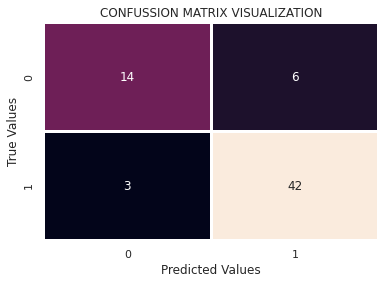

In [99]:
#confusion matrix: Idea for a yes/no predictions
print(confusion_matrix(y_test,y_pred_ens))

sns.heatmap(confusion_matrix(y_test,y_pred_ens),annot=True,lw =2,cbar=False)
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("CONFUSSION MATRIX VISUALIZATION")
plt.show()

In [100]:
print(classification_report(y_test,y_pred_ens))

              precision    recall  f1-score   support

           0       0.82      0.70      0.76        20
           1       0.88      0.93      0.90        45

    accuracy                           0.86        65
   macro avg       0.85      0.82      0.83        65
weighted avg       0.86      0.86      0.86        65



* Ensemblement learning(soft voting) produced a recall of 86%. Thus out of all positive classes, 86% was predicted correctly.
* Precision was 86%, of all positve classes predicted correctly, 86% were actually positive.
* 42 candidates were correctly predicted as employed, 3 were wrongly predicted as unemployed.
* 14 candidates where were correctly predicted as unemployed while 6 were unemployed but model predicted them as employed.
* The model made predictions with 86% accuracy across both classes.

In [102]:
eclf2 = VotingClassifier(estimators=[('dt', dmodel), ('rf1', rtmodel), ('rf2', RFCmodel),('cat', CatModel), ('lgb', LGmodel),('xgb', XGmodel),('xgb2', XGmodel2)], voting='hard', weights=[1, 1, 1, 1, 1, 1, 1])
eclf2.fit(X_train, y_train)

Learning rate set to 0.004583
0:	learn: 0.6898864	total: 2.97ms	remaining: 2.97s
1:	learn: 0.6865931	total: 4.37ms	remaining: 2.18s
2:	learn: 0.6828043	total: 5.68ms	remaining: 1.89s
3:	learn: 0.6787209	total: 6.77ms	remaining: 1.69s
4:	learn: 0.6753042	total: 7.93ms	remaining: 1.58s
5:	learn: 0.6718107	total: 8.97ms	remaining: 1.49s
6:	learn: 0.6683066	total: 9.88ms	remaining: 1.4s
7:	learn: 0.6648376	total: 10.9ms	remaining: 1.35s
8:	learn: 0.6610865	total: 11.9ms	remaining: 1.31s
9:	learn: 0.6575755	total: 12.8ms	remaining: 1.26s
10:	learn: 0.6546631	total: 13.4ms	remaining: 1.21s
11:	learn: 0.6510681	total: 14.4ms	remaining: 1.18s
12:	learn: 0.6479614	total: 15.3ms	remaining: 1.16s
13:	learn: 0.6446444	total: 16.2ms	remaining: 1.14s
14:	learn: 0.6419638	total: 17.1ms	remaining: 1.12s
15:	learn: 0.6386813	total: 17.9ms	remaining: 1.1s
16:	learn: 0.6355751	total: 18.8ms	remaining: 1.09s
17:	learn: 0.6324552	total: 19.7ms	remaining: 1.08s
18:	learn: 0.6290938	total: 20.6ms	remaining: 

201:	learn: 0.3218907	total: 186ms	remaining: 735ms
202:	learn: 0.3213891	total: 187ms	remaining: 736ms
203:	learn: 0.3206555	total: 188ms	remaining: 735ms
204:	learn: 0.3196881	total: 189ms	remaining: 733ms
205:	learn: 0.3187395	total: 190ms	remaining: 732ms
206:	learn: 0.3178179	total: 191ms	remaining: 731ms
207:	learn: 0.3168822	total: 192ms	remaining: 730ms
208:	learn: 0.3160300	total: 193ms	remaining: 729ms
209:	learn: 0.3155197	total: 193ms	remaining: 727ms
210:	learn: 0.3146566	total: 194ms	remaining: 726ms
211:	learn: 0.3138891	total: 195ms	remaining: 725ms
212:	learn: 0.3133548	total: 196ms	remaining: 724ms
213:	learn: 0.3124948	total: 197ms	remaining: 723ms
214:	learn: 0.3116560	total: 198ms	remaining: 722ms
215:	learn: 0.3107248	total: 199ms	remaining: 721ms
216:	learn: 0.3096287	total: 199ms	remaining: 720ms
217:	learn: 0.3087101	total: 200ms	remaining: 718ms
218:	learn: 0.3079413	total: 201ms	remaining: 717ms
219:	learn: 0.3069404	total: 202ms	remaining: 716ms
220:	learn: 

406:	learn: 0.2076040	total: 373ms	remaining: 544ms
407:	learn: 0.2071761	total: 374ms	remaining: 543ms
408:	learn: 0.2067833	total: 375ms	remaining: 542ms
409:	learn: 0.2065454	total: 376ms	remaining: 541ms
410:	learn: 0.2061443	total: 377ms	remaining: 540ms
411:	learn: 0.2060118	total: 378ms	remaining: 539ms
412:	learn: 0.2056499	total: 379ms	remaining: 538ms
413:	learn: 0.2050711	total: 379ms	remaining: 537ms
414:	learn: 0.2047432	total: 380ms	remaining: 536ms
415:	learn: 0.2043579	total: 381ms	remaining: 535ms
416:	learn: 0.2040339	total: 382ms	remaining: 534ms
417:	learn: 0.2036022	total: 383ms	remaining: 533ms
418:	learn: 0.2032299	total: 384ms	remaining: 532ms
419:	learn: 0.2030208	total: 385ms	remaining: 531ms
420:	learn: 0.2025202	total: 386ms	remaining: 530ms
421:	learn: 0.2021808	total: 387ms	remaining: 529ms
422:	learn: 0.2019980	total: 387ms	remaining: 528ms
423:	learn: 0.2014763	total: 388ms	remaining: 528ms
424:	learn: 0.2011474	total: 389ms	remaining: 527ms
425:	learn: 

616:	learn: 0.1468826	total: 560ms	remaining: 348ms
617:	learn: 0.1465984	total: 561ms	remaining: 347ms
618:	learn: 0.1463576	total: 562ms	remaining: 346ms
619:	learn: 0.1461131	total: 563ms	remaining: 345ms
620:	learn: 0.1459054	total: 564ms	remaining: 344ms
621:	learn: 0.1457354	total: 565ms	remaining: 343ms
622:	learn: 0.1455016	total: 565ms	remaining: 342ms
623:	learn: 0.1452020	total: 566ms	remaining: 341ms
624:	learn: 0.1450036	total: 567ms	remaining: 340ms
625:	learn: 0.1447231	total: 568ms	remaining: 339ms
626:	learn: 0.1445697	total: 569ms	remaining: 339ms
627:	learn: 0.1443357	total: 570ms	remaining: 338ms
628:	learn: 0.1440920	total: 571ms	remaining: 337ms
629:	learn: 0.1438768	total: 572ms	remaining: 336ms
630:	learn: 0.1436044	total: 572ms	remaining: 335ms
631:	learn: 0.1433082	total: 573ms	remaining: 334ms
632:	learn: 0.1431101	total: 574ms	remaining: 333ms
633:	learn: 0.1428275	total: 575ms	remaining: 332ms
634:	learn: 0.1426537	total: 576ms	remaining: 331ms
635:	learn: 

831:	learn: 0.1085622	total: 749ms	remaining: 151ms
832:	learn: 0.1084286	total: 750ms	remaining: 150ms
833:	learn: 0.1082407	total: 751ms	remaining: 149ms
834:	learn: 0.1080897	total: 751ms	remaining: 148ms
835:	learn: 0.1079258	total: 752ms	remaining: 148ms
836:	learn: 0.1078130	total: 753ms	remaining: 147ms
837:	learn: 0.1076654	total: 754ms	remaining: 146ms
838:	learn: 0.1074516	total: 755ms	remaining: 145ms
839:	learn: 0.1072571	total: 756ms	remaining: 144ms
840:	learn: 0.1071378	total: 757ms	remaining: 143ms
841:	learn: 0.1069743	total: 758ms	remaining: 142ms
842:	learn: 0.1068548	total: 758ms	remaining: 141ms
843:	learn: 0.1066884	total: 759ms	remaining: 140ms
844:	learn: 0.1065730	total: 760ms	remaining: 139ms
845:	learn: 0.1064584	total: 761ms	remaining: 139ms
846:	learn: 0.1063669	total: 762ms	remaining: 138ms
847:	learn: 0.1062386	total: 763ms	remaining: 137ms
848:	learn: 0.1060705	total: 764ms	remaining: 136ms
849:	learn: 0.1059335	total: 765ms	remaining: 135ms
850:	learn: 

VotingClassifier(estimators=[('dt', DecisionTreeClassifier()),
                             ('rf1', RandomForestClassifier()),
                             ('rf2',
                              RandomForestClassifier(max_depth=3,
                                                     n_estimators=141,
                                                     random_state=1)),
                             ('cat',
                              <catboost.core.CatBoostClassifier object at 0x7f7d7aefd6d0>),
                             ('lgb', LGBMClassifier()),
                             ('xgb',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=...
                                            interaction_constraints='',
                                            learning_rate=0.1, max_delta_step=0,
                                            m

In [103]:
y_pred_ens2 = eclf2.predict(X_test)

In [104]:
accuracy_score(y_pred_ens2,y_test)

0.8769230769230769

[[14  6]
 [ 2 43]]


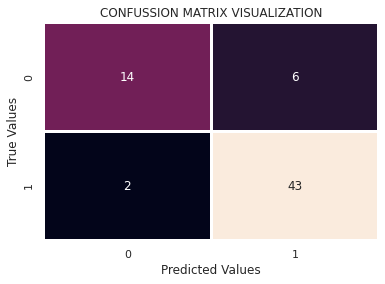

In [106]:
#confusion matrix: Idea for a yes/no predictions
print(confusion_matrix(y_test,y_pred_ens2))

sns.heatmap(confusion_matrix(y_test,y_pred_ens2),annot=True,lw =2,cbar=False)
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("CONFUSSION MATRIX VISUALIZATION")
plt.show()

In [105]:
print(classification_report(y_test,y_pred_ens2))

              precision    recall  f1-score   support

           0       0.88      0.70      0.78        20
           1       0.88      0.96      0.91        45

    accuracy                           0.88        65
   macro avg       0.88      0.83      0.85        65
weighted avg       0.88      0.88      0.87        65



* Ensemblement learning(hard voting) produced a recall of 88%. Thus out of all positive classes, 88% was predicted correctly.
* Precision was 88%, of all positve classes predicted correctly, 88% were actually positive.
* 43 candidates were correctly predicted as employed, 2 were wrongly predicted as unemployed.
* 14 candidates where were correctly predicted as unemployed while 6 were unemployed but model predicted them as employed.
* The model made predictions with 88% accuracy across both classes.

# CONCLUSION

* Gender does not inflence your chances of getting hired.
* Academic grades play a massive role in your chances of getting hired. Very high grades increases your chances of getting hired.
* Candidates that specialised in Marketing and Finance relatively gain higher salaries than their counterparts in Marketing and Human Resource.
* Employability test performance do not enhance your chances of getting hired.